In [1]:
import numpy as np
import matplotlib.pyplot as plt
from csimage import csImagecodec
from PIL import Image, ImageOps

In [2]:
!wget -nc https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

File ‘Lenna_(test_image).png’ already there; not retrieving.



/opt/anaconda3/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


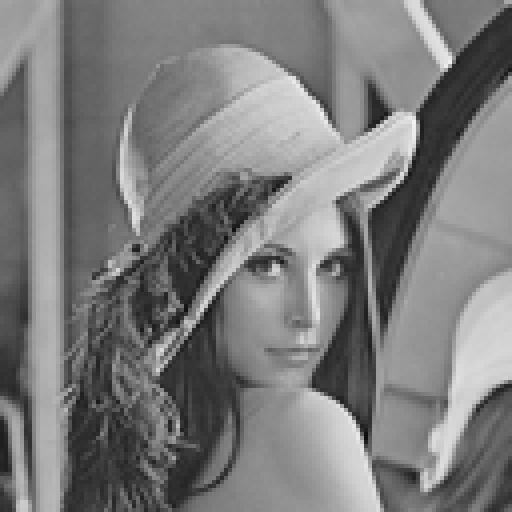

In [3]:
csimage = csImagecodec (wavelet_family = 'db10',
                        save_video=False,
                        weighthistory=False)

img = Image.open('Lenna_(test_image).png')
img = ImageOps.grayscale(img)
newsize = 128,128
img = img.resize(newsize, Image.LANCZOS)
#display(img)
display(img.resize((512,512), Image.NEAREST))

In [4]:
encoded_image = csimage.encode_image(img, 0.7, wavelet_level=2)
print(encoded_image)

2025-08-12 18:32:39.268710: W external/xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:848] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.
2025-08-12 18:32:39.268724: W external/xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:851] Conv: %cudnn-conv = (f32[128,1,66]{2,1,0}, u8[0]{0}) custom-call(%bitcast, %constant.30), window={size=20 stride=2 pad=1_1}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", metadata={op_name="jit(times)/jit(wavedec2)/jit(dwt_axis_)/vmap(jit(dwt_))/conv_general_dilated" source_file="/home/mhmaruo/.local/lib/python3.11/site-packages/cr/wavelets/_src/transform.py" source_line=86}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}


XlaRuntimeError: UNKNOWN: Failed to determine best cudnn convolution algorithm for:
%cudnn-conv = (f32[128,1,66]{2,1,0}, u8[0]{0}) custom-call(%bitcast, %constant.30), window={size=20 stride=2 pad=1_1}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", metadata={op_name="jit(times)/jit(wavedec2)/jit(dwt_axis_)/vmap(jit(dwt_))/conv_general_dilated" source_file="/home/mhmaruo/.local/lib/python3.11/site-packages/cr/wavelets/_src/transform.py" source_line=86}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}

Original error: INTERNAL: All algorithms tried for (f32[128,1,66]{2,1,0}, u8[0]{0}) custom-call(f32[128,1,148]{2,1,0}, f32[1,1,20]{2,1,0}), window={size=20 stride=2 pad=1_1}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","reification_cost":[],"wait_on_operation_queues":[]} failed. Falling back to default algorithm.  Per-algorithm errors:
  Profiling failure on cuDNN engine eng0{}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(5308): 'status'
  Profiling failure on cuDNN engine eng28{k2=3,k3=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(5308): 'status'
  Profiling failure on cuDNN engine eng2{k2=4,k3=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(5308): 'status'
  Profiling failure on cuDNN engine eng1{k2=4,k3=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(5308): 'status'
  Profiling failure on cuDNN engine eng28{k2=0,k3=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(5308): 'status'
  Profiling failure on cuDNN engine eng1{k2=0,k3=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(5308): 'status'
  Profiling failure on cuDNN engine eng28{k2=1,k3=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(5308): 'status'
  Profiling failure on cuDNN engine eng1{k2=1,k3=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(5308): 'status'
  Profiling failure on cuDNN engine eng1{}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(5308): 'status'
  Profiling failure on cuDNN engine eng28{}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(5308): 'status'
  Profiling failure on cuDNN engine eng0{}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(5308): 'status'
  Profiling failure on cuDNN engine eng2{k2=1,k3=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(5308): 'status'

To ignore this failure and try to use a fallback algorithm (which may have suboptimal performance), use XLA_FLAGS=--xla_gpu_strict_conv_algorithm_picker=false.  Please also file a bug for the root cause of failing autotuning.

In [ ]:
# Decode the image
iterations = 1000
decimation = 1
decoded_image = csimage.decode_image(decimation=decimation,iterations=iterations,step_size=1.0,y=encoded_image)

In [ ]:
display (decoded_image.resize((512,512), Image.NEAREST))

In [ ]:
# csimage.plot_weights_history(iterations=iterations, decimation=decimation)

In [ ]:
csimage.save_video(iterations=iterations,decimation=decimation)